# Lab 3 - Reciever Operating Characteristics

6252320 - Leon Debnath

## 1. Introduction 
 
ROC  analysis  of  probabilistic  classifiers  is  important  topic  in  machine  learning.  It  is  used when we need to decide whether the posterior class probabilities that the classifiers assign to test instances allow us to separate correctly the instances according to their class labels.  In this lab you will implement a class ROC in Python that can be used for ROC analysis for two  class  problems  (e.g.  problems  with  positive  and  negative  classes).  Description  of  the application program interface of this class is provided in the next section.   

## 2. Lab Tasks 
We  need  to  implement  the  lab  tasks  related  to  class  ROC  in  the  following  context.  A probabilistic classifer $h$ has been first trained on some labeled training data and then tested on  a  test  set  of  labeled  test  instances.  For  each  test  instance  $x$  classifier  $h$  has  outputted posterior probability of the positive class and posterior probability of the negative class. The class probabilities of the test instances are saved in a `pandas.DataFrame` object `Probs` and the true class labels of the test instances are saved in a `pandas.DataFrame` object `TrueClass`. The correspondence between object `Probs` and object `TrueClass` is index-based: the positive-class probability of the $i^{th}$ instance $x$ is the $i^{th}$ element of $P$ and the true-class label of the $i^{th}$ instance is the $i^{th}$ element of `TrueClass`. 

In the context we have just described, supply class ROC with the following methods:

In [145]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal


In [146]:
class ROC:
    
    #######
    #  A.  
    #######
    # Parametric constructor ROC that can accept two input parameters:
    #
    #     a. object Probs that contains the estimated probabilities of
    #        the test instances for the positive class, and 
    #
    #     b. object TrueClass that contains the true class of the test
    #        instances. Note that Probs and  TrueClass have to be saved
    #        in instance fields of ROC objects to allow operation of 
    #        other methods in ROC. 
    
    def __init__(self, probs, true_class):
        self.probs = probs
        self.true_class = true_class
        self.data = pd.DataFrame({'pos': probs['pos'],
                                  'neg': probs['neg'],
                                  'class': true_class['true']})
        self.coords = []

        
    #######
    #  B.
    #######
    # Method compute_ROC_coordinates that computes the TPr and FPr coordinates
    # of the ROC curve from the positive class probabilities and true classes
    # of the test instances (see Appendix A for pseudocode).  One of the main
    # problems when implementing method compute_ROC_coordinates  is  to  decide
    # how  to  handle  test  instances  of opposite  classes  that  have  the
    # same  probability  for  the  positive  class.  Propose  one strategy and
    # implement this strategy in method compute_ROC_coordinates.
        
    def compute_coordinates(self):       
        fp = 0
        tp = 0
        p = true_class['true'].value_counts()[1]
        n = true_class['true'].value_counts()[0]
        
        coords = self.coords
        prev_prob = -np.inf
        
        # Sort probabilities by positive instance in decreasing order
        data = self.data.sort_values('pos', axis=0, ascending=False)
             
        for i in range(len(data)):
            if data.loc[i,'pos'] != prev_prob:
                coords.append(((fp/n), (tp/p)))
                prev_prob = data.loc[i,'pos']
            
            if data.loc[i,'class'] == 1:
                tp += 1
            else:
                fp += 1
        
        self.coords = coords
        return coords
    
    
    #######
    #  C.
    #######
    # Method plot_ROC that plots the ROC curve
    
    def plot(self):
        
        if len(coords) == 0:
            compute_coordinates()
        plt.plot(coords)
    
    
    #######
    #  D.
    #######
    # Method compute_AUCROC that computes the area under curve (AUC) 
    # of the ROC curve from the positive-class probabilities and 
    # true classes  of the test instances (for the  sake  of  
    # computational  efficiency,  the  method  assumes  that  we  first
    # run  method compute_ROC_coordinates).
    
    def AUC(self):
        pass

Report: Prepare a pdf file of the Jupiter notebook with your code for class ROC that contains 
methods specified in A, B, C, D, and E.  In the markdown for B state your strategy to handle test 
instances of opposite classes that have the same probability for the positive class. 

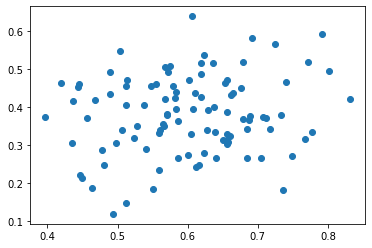

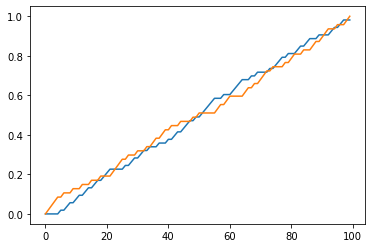

In [149]:
########
# Part E 
########
# Provide code to test all the methods of class ROC with a probabilistic classifier from 
# sklearn or the kNN classifier from Lab 2. The data set is the diabetes data set. 


# Create a random data set to build 
probs = pd.DataFrame({'pos': normal(loc=0.6, scale=0.1, size=100),
                      'neg': normal(loc=0.4, scale=0.1, size=100)})
true_class = pd.DataFrame({'true': [random.randint(0,1) for i in range(100)]})

plt.figure(1)
plt.scatter(probs['pos'], probs['neg'])

roc = ROC(probs, true_class)
plt.figure(2)
roc.plot()


### F. (nongraded) 
Method compute_ROC_convex_hull_coordinates that computes the TPr and FPr coordinates of the ROC convex hull curve from the positive-class probabilities and true classes of the test instances. 